In [1]:
import pandas as pd
train = pd.read_csv('twitter_training.csv', header = None)
val = pd.read_csv('twitter_validation.csv', header = None)
val

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [2]:
train

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
train.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
val.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']

In [4]:
train

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
train.isnull().sum()

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64

In [6]:
train.dropna(inplace=True)

In [7]:
val.isnull().sum()

Tweet ID         0
entity           0
sentiment        0
Tweet content    0
dtype: int64

In [8]:
train['sentiment'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x17b8193ea00>,
 [Text(0.6405340523523443, 0.8942684875232295, 'Negative'),
  Text(-1.0270700901527094, 0.3938616888118283, 'Positive'),
  Text(-0.3158645856851206, -1.0536743156734756, 'Neutral'),
  Text(0.9397125984775401, -0.5717868766092746, 'Irrelevant')],
 [Text(0.3493822103740059, 0.48778281137630697, '30.2%'),
  Text(-0.5602200491742051, 0.2148336484428154, '27.9%'),
  Text(-0.17228977401006576, -0.5747314449128048, '24.5%'),
  Text(0.5125705082604763, -0.31188375087778614, '17.4%')])

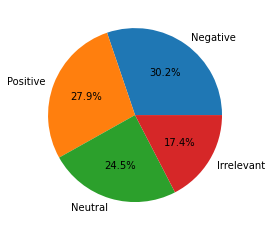

In [9]:
import matplotlib.pyplot as plt
plt.pie(train['sentiment'].value_counts(), labels = ['Negative', 'Positive', 'Neutral', 'Irrelevant'], autopct='%1.1f%%')

In [18]:
from nltk.tokenize import word_tokenize,sent_tokenize
for i in train['Tweet content'][:10]:
    print(word_tokenize(i) )

['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']
['I', 'am', 'coming', 'to', 'the', 'borders', 'and', 'I', 'will', 'kill', 'you', 'all', ',']
['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all', ',']
['im', 'coming', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all', ',']
['im', 'getting', 'on', 'borderlands', '2', 'and', 'i', 'will', 'murder', 'you', 'me', 'all', ',']
['im', 'getting', 'into', 'borderlands', 'and', 'i', 'can', 'murder', 'you', 'all', ',']
['So', 'I', 'spent', 'a', 'few', 'hours', 'making', 'something', 'for', 'fun', '.', '.', '.', 'If', 'you', 'do', "n't", 'know', 'I', 'am', 'a', 'HUGE', '@', 'Borderlands', 'fan', 'and', 'Maya', 'is', 'one', 'of', 'my', 'favorite', 'characters', '.', 'So', 'I', 'decided', 'to', 'make', 'myself', 'a', 'wallpaper', 'for', 'my', 'PC', '.', '.', 'Here', 'is', 'the', 'original', 'image', 'versus', 'the', 'creation', 'I', 'made', ':', ')', 'Enjoy', '!', 'pic.tw

C:\Users\mahip\AppData\Local\Temp\ipykernel_15448\2585557426.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for i in train['Tweet content'][:10]:


In [3]:
from nltk.tokenize import word_tokenize
s = "My name is abhay."
wt = word_tokenize(s)

wt

['My', 'name', 'is', 'abhay', '.']

In [21]:
from nltk import pos_tag

In [30]:
text ="Hey this is Mahipal Singh. I love to play basketball"
print("\nText : ",text)
text = word_tokenize(text)
print("\nAfter Tokenization : ",text)
tokens_tag = pos_tag(text)
print("\nAfter pos Token : ",tokens_tag)



Text :  Hey this is Mahipal Singh. I love to play basketball

After Tokenization :  ['Hey', 'this', 'is', 'Mahipal', 'Singh', '.', 'I', 'love', 'to', 'play', 'basketball']

After pos Token :  [('Hey', 'NNP'), ('this', 'DT'), ('is', 'VBZ'), ('Mahipal', 'JJ'), ('Singh', 'NNP'), ('.', '.'), ('I', 'PRP'), ('love', 'VBP'), ('to', 'TO'), ('play', 'VB'), ('basketball', 'NN')]


In [28]:
import nltk 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mahip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

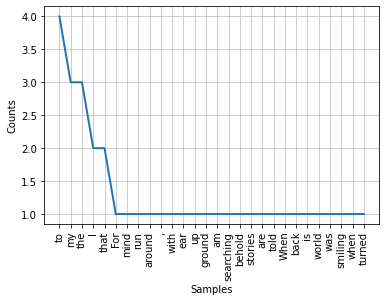

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [32]:
import nltk
a = "For my mind to run around, with my ear up to the ground I am searching to behold the stories that are told When my back is to the world that was smiling when I turned"
words = nltk.tokenize.word_tokenize(a)
fd = nltk.FreqDist(words)
fd.plot()

In [35]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w)
    print(" stemmed : ", ps.stem(w))
    print(" lemmatized : ",lem.lemmatize(w))

program
 stemmed :  program
 lemmatized :  program
programs
 stemmed :  program
 lemmatized :  program
programmer
 stemmed :  programm
 lemmatized :  programmer
programming
 stemmed :  program
 lemmatized :  programming
programmers
 stemmed :  programm
 lemmatized :  programmer
